In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from pandas import Series,DataFrame


In [2]:
url='http://eciresults.nic.in/PartyWiseResultS20.htm?st=S20'

In [3]:
result=requests.get(url)
c=result.content
soup=BeautifulSoup(c)

In [9]:
summary=soup.find("div",{'id':'div1','style':'border-style: none; table-layout: auto;'})
tables=summary.find_all('table')

In [18]:
data=[]
rows=tables[0].findAll('tr')#tr=table in rows
for tr in rows:
    cols=tr.findAll('td')
    for td in cols:
        text=td.findAll(text=True)
        print(text)
        data.append(text)


[' Rajasthan\xa0', 'Result Status ']
[' Status Known For 199 out of 200 Constituencies']
['Bahujan Samaj Party']
['6']
['0']
['6']
['Bharatiya Janata Party']
['73']
['0']
['73']
['Communist Party of India  (Marxist)']
['2']
['0']
['2']
['Indian National Congress']
['99']
['0']
['99']
['Bhartiya Tribal Party']
['2']
['0']
['2']
['Rashtriya Lok Dal']
['1']
['0']
['1']
['Rashtriya Loktantrik Party']
['3']
['0']
['3']
['Independent']
['13']
['0']
['13']
['Total']
['199']
['0']
['199']
['Partywise Vote Share']
[]


In [19]:
print(data)

[[' Rajasthan\xa0', 'Result Status '], [' Status Known For 199 out of 200 Constituencies'], ['Bahujan Samaj Party'], ['6'], ['0'], ['6'], ['Bharatiya Janata Party'], ['73'], ['0'], ['73'], ['Communist Party of India  (Marxist)'], ['2'], ['0'], ['2'], ['Indian National Congress'], ['99'], ['0'], ['99'], ['Bhartiya Tribal Party'], ['2'], ['0'], ['2'], ['Rashtriya Lok Dal'], ['1'], ['0'], ['1'], ['Rashtriya Loktantrik Party'], ['3'], ['0'], ['3'], ['Independent'], ['13'], ['0'], ['13'], ['Total'], ['199'], ['0'], ['199'], ['Partywise Vote Share'], []]


In [20]:
data.pop(0)
data.pop(0)
data.pop()
data.pop() 

['Partywise Vote Share']

In [21]:
print(data)

[['Bahujan Samaj Party'], ['6'], ['0'], ['6'], ['Bharatiya Janata Party'], ['73'], ['0'], ['73'], ['Communist Party of India  (Marxist)'], ['2'], ['0'], ['2'], ['Indian National Congress'], ['99'], ['0'], ['99'], ['Bhartiya Tribal Party'], ['2'], ['0'], ['2'], ['Rashtriya Lok Dal'], ['1'], ['0'], ['1'], ['Rashtriya Loktantrik Party'], ['3'], ['0'], ['3'], ['Independent'], ['13'], ['0'], ['13'], ['Total'], ['199'], ['0'], ['199']]


In [26]:
d=[''.join(i) for i in data]
d

['Bahujan Samaj Party',
 '6',
 '0',
 '6',
 'Bharatiya Janata Party',
 '73',
 '0',
 '73',
 'Communist Party of India  (Marxist)',
 '2',
 '0',
 '2',
 'Indian National Congress',
 '99',
 '0',
 '99',
 'Bhartiya Tribal Party',
 '2',
 '0',
 '2',
 'Rashtriya Lok Dal',
 '1',
 '0',
 '1',
 'Rashtriya Loktantrik Party',
 '3',
 '0',
 '3',
 'Independent',
 '13',
 '0',
 '13',
 'Total',
 '199',
 '0',
 '199']

In [27]:
data=d.copy()

In [32]:
PartyName=Series(data[0::4])
won=Series(data[1::4])
Leading=Series(data[2::4])
Total=Series(data[3::4])

In [33]:
print(PartyName)

0                    Bahujan Samaj Party
1                 Bharatiya Janata Party
2    Communist Party of India  (Marxist)
3               Indian National Congress
4                  Bhartiya Tribal Party
5                      Rashtriya Lok Dal
6             Rashtriya Loktantrik Party
7                            Independent
8                                  Total
dtype: object


In [34]:
legislative_df=pd.concat([PartyName,won,Leading,Total],axis=1)
legislative_df.columns=['Party','Won','Leading','Total']
legislative_df

,Party,Won,Leading,Total
0,Bahujan Samaj Party,6,0,6
1,Bharatiya Janata Party,73,0,73
2,Communist Party of India (Marxist),2,0,2
3,Indian National Congress,99,0,99
4,Bhartiya Tribal Party,2,0,2
5,Rashtriya Lok Dal,1,0,1
6,Rashtriya Loktantrik Party,3,0,3
7,Independent,13,0,13
8,Total,199,0,199


In [35]:
from matplotlib import pyplot as plt

In [37]:
t=[int(i) for i in (data[3::4])]
t

[6, 73, 2, 99, 2, 1, 3, 13, 199]

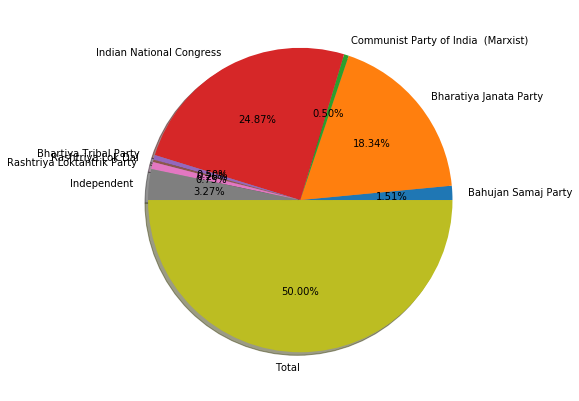

In [42]:
plt.figure(figsize=(8,7))
plt.pie(t,labels=PartyName,autopct='%0.2f%%',shadow=True,startangle=0)
plt.show()